In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('whole_record.csv')

C:\Users\12574\anaconda3\envs\mydl\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (2,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.judge_result.describe()

count           287509
unique               9
top       Wrong Answer
freq            117157
Name: judge_result, dtype: object

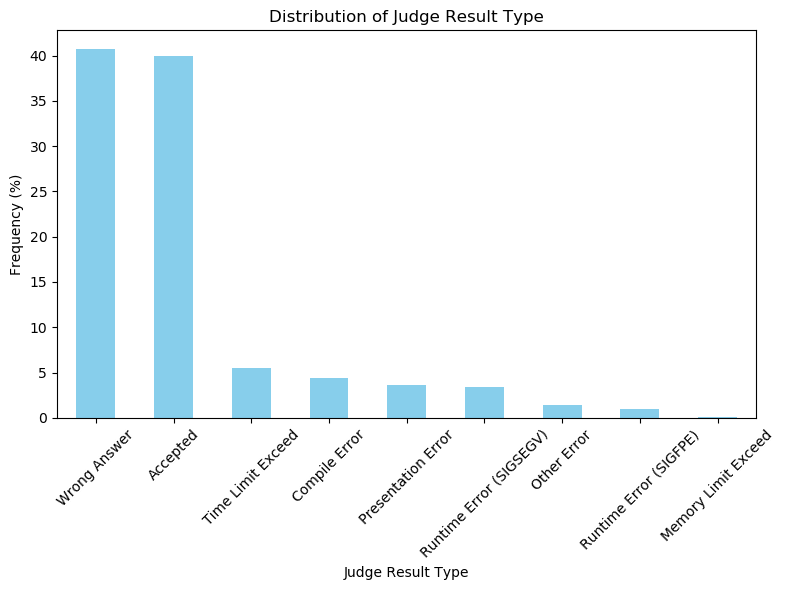

In [7]:
# Calculate the frequency of each value type
value_counts = df['judge_result'].value_counts(normalize=True) * 100  # Calculate frequency as a percentage

# Plot the distribution
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Judge Result Type')
plt.xlabel('Judge Result Type')
plt.ylabel('Frequency (%)')  # Update y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [45]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'user_id', 'user_name', 'submission_id',
       'judge_result', 'judge_info', 'score', 'language', 'code_lines',
       'execution_time', 'execution_memory', 'submission_time', 'code',
       'problem_set', 'problem_name', 'qid', 'qid_text', 'pass/user_num',
       'pass/submission_num', 'tag1', 'tag2', 'tag3', 'token_nums'],
      dtype='object')

In [46]:
# drop nan tags rows
df = df.fillna('nan')
df = df.dropna(subset=['tag1'])
df = df[df['tag1']!='nan']

In [47]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,user_id,user_name,submission_id,judge_result,judge_info,score,language,code_lines,...,problem_set,problem_name,qid,qid_text,pass/user_num,pass/submission_num,tag1,tag2,tag3,token_nums
0,0,0,22371059,林俊昊,4919300,Accepted,nan,1.0,c,4,...,C1,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,22
1,1,1,22371187,周子皓,4875008,Accepted,nan,1.0,c,10,...,C1,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,55
2,2,2,22371298,韩昕睿,4874473,Presentation Error,nan,0.0,c,8,...,C1,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,41
3,3,3,22373087,田家全,4870406,Accepted,nan,1.0,c,5,...,C1,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,31
4,4,4,22373085,张明远,4869448,Accepted,nan,1.0,c,14,...,C1,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,77
5,5,5,22373032,秦敏泽,4867856,Accepted,nan,1.0,c,5,...,C1,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,31
6,6,6,22373561,黄胤桢,4867334,Accepted,nan,1.0,c,9,...,C1,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,47
7,7,7,22373338,袁天宇,4860052,Accepted,nan,1.0,c,9,...,C1,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,59
8,8,8,22373338,袁天宇,4860051,Presentation Error,nan,0.0,c,9,...,C1,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,59
9,9,9,22373535,李蕊,4859915,Accepted,nan,1.0,c,8,...,C1,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,54


In [48]:
tags_set = set()

for col in ['tag1','tag2','tag3']:
    tag_unique = df[col].unique()
    tags_set.update(tag_unique)

tags_set

{'01背包',
 'A+B问题',
 'nan',
 '二分',
 '二分查找',
 '二进制',
 '代码基础',
 '位运算',
 '冒泡排序',
 '判断',
 '动态规划',
 '博弈论',
 '反演变换',
 '字符串',
 '循环',
 '快速排序',
 '指针',
 '排序',
 '数学几何',
 '数学计算',
 '数据类型',
 '数组',
 '数论',
 '无',
 '时间日期计算',
 '暴力',
 '模拟',
 '深度优先搜索',
 '质数',
 '贪心',
 '转义字符',
 '输入输出',
 '辗转相除法',
 '进制',
 '递归',
 '递推',
 '集合',
 '高精度'}

In [49]:
tags_set.remove('nan')

In [50]:
tags_map = {}
i = 0
for item in tags_set:
    tags_map[item] = i
    i+=1


In [51]:
tags_map

{'递归': 0,
 '无': 1,
 '排序': 2,
 '时间日期计算': 3,
 '位运算': 4,
 'A+B问题': 5,
 '博弈论': 6,
 '判断': 7,
 '冒泡排序': 8,
 '数学计算': 9,
 '循环': 10,
 '数据类型': 11,
 '进制': 12,
 '模拟': 13,
 '二分查找': 14,
 '转义字符': 15,
 '集合': 16,
 '反演变换': 17,
 '贪心': 18,
 '数学几何': 19,
 '暴力': 20,
 '01背包': 21,
 '二进制': 22,
 '高精度': 23,
 '指针': 24,
 '输入输出': 25,
 '字符串': 26,
 '质数': 27,
 '辗转相除法': 28,
 '代码基础': 29,
 '二分': 30,
 '数论': 31,
 '递推': 32,
 '数组': 33,
 '动态规划': 34,
 '深度优先搜索': 35,
 '快速排序': 36}

In [52]:
df['class'] = df['tag1'].apply(lambda x:tags_map[x])
df.head(10)

,Unnamed: 0,Unnamed: 0.1,user_id,user_name,submission_id,judge_result,judge_info,score,language,code_lines,...,problem_name,qid,qid_text,pass/user_num,pass/submission_num,tag1,tag2,tag3,token_nums,class
0,0,0,22371059,林俊昊,4919300,Accepted,nan,1.0,c,4,...,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,22,25
1,1,1,22371187,周子皓,4875008,Accepted,nan,1.0,c,10,...,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,55,25
2,2,2,22371298,韩昕睿,4874473,Presentation Error,nan,0.0,c,8,...,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,41,25
3,3,3,22373087,田家全,4870406,Accepted,nan,1.0,c,5,...,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,31,25
4,4,4,22373085,张明远,4869448,Accepted,nan,1.0,c,14,...,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,77,25
5,5,5,22373032,秦敏泽,4867856,Accepted,nan,1.0,c,5,...,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,31,25
6,6,6,22373561,黄胤桢,4867334,Accepted,nan,1.0,c,9,...,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,47,25
7,7,7,22373338,袁天宇,4860052,Accepted,nan,1.0,c,9,...,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,59,25
8,8,8,22373338,袁天宇,4860051,Presentation Error,nan,0.0,c,9,...,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,59,25
9,9,9,22373535,李蕊,4859915,Accepted,nan,1.0,c,8,...,C1_A,5947,北航70周年校庆！,1290 / 1322,1290 / 3732,输入输出,nan,nan,54,25


In [53]:
df_out = df[['code','class']]

In [54]:
df_out.head(10)

,code,class
0,"int main()\r\n{\r\n\tprintf(""Hello, BUAA!\nThi...",25
1,#include<stdio.h>\r\n#include<stdlib.h>\r\n#in...,25
2,#include<stdio.h>\r\nint main() \r\n\r\n{ pr...,25
3,"#include<stdio.h>\r\nint main(){\r\n\tprintf(""...",25
4,#include <stdio.h>\r\n#include <stdlib.h>\r\n#...,25
5,"#include<stdio.h>\r\nint main(){\r\n\tprintf(""...",25
6,#include <stdio.h>\r\n#include <stdlib.h>\r\n#...,25
7,#include<stdio.h>\r\nint main()\r\n{\r\n\tprin...,25
8,#include<stdio.h>\r\nint main()\r\n{\r\n\tprin...,25
9,#include<stdio.h>\r\nint main()\r\n{\r\n pr...,25


In [58]:
df_out['id'] = df_out.index

C:\Users\12574\anaconda3\envs\mydl\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
df_out

,code,class,1,id
0,"int main()\r\n{\r\n\tprintf(""Hello, BUAA!\nThi...",25,0,0
1,#include<stdio.h>\r\n#include<stdlib.h>\r\n#in...,25,1,1
2,#include<stdio.h>\r\nint main() \r\n\r\n{ pr...,25,2,2
3,"#include<stdio.h>\r\nint main(){\r\n\tprintf(""...",25,3,3
4,#include <stdio.h>\r\n#include <stdlib.h>\r\n#...,25,4,4
...,...,...,...,...
287504,#include <stdio.h>_x000D_\n#include <string.h>...,21,287504,287504
287505,#include <stdio.h>_x000D_\n#include <string.h>...,21,287505,287505
287506,#include <stdio.h>_x000D_\nconst double base =...,21,287506,287506
287507,#include <stdio.h>_x000D_\nconst double base =...,21,287507,287507


In [65]:
df_out = df_out[['id','code','label']]

In [69]:
df_out.head(10)

,id,code,label
0,0,"int main()\n{\n\tprintf(""Hello, BUAA!\nThis ye...",25
1,1,#include<stdio.h>\n#include<stdlib.h>\n#includ...,25
2,2,"#include<stdio.h>\nint main() \n\n{ printf(""...",25
3,3,"#include<stdio.h>\nint main(){\n\tprintf(""Hell...",25
4,4,#include <stdio.h>\n#include <stdlib.h>\n#incl...,25
5,5,"#include<stdio.h>\nint main(){\n\tprintf(""Hell...",25
6,6,#include <stdio.h>\n#include <stdlib.h>\n#incl...,25
7,7,"#include<stdio.h>\nint main()\n{\n\tprintf(""He...",25
8,8,"#include<stdio.h>\nint main()\n{\n\tprintf(""He...",25
9,9,"#include<stdio.h>\nint main()\n{\n printf(""...",25


In [71]:
import re

def remove_preprocessor_and_comments(code):
    # Remove preprocessor statements
    code = re.sub(r'^\s*#.*', '', code, flags=re.MULTILINE)

    # Remove single-line comments
    code = re.sub(r'//.*', '', code)



    # Remove multi-line comments
    code = re.sub(r'/\*.*?\*/', '', code, flags=re.DOTALL)

    return code


df_out['code'] = df_out['code'].apply(remove_preprocessor_and_comments)

In [73]:
df_out['code'] = df_out['code'].str.replace('\r', '')
df_out['code'] = df_out['code'].str.replace('_x000D_', '')

df_out.to_csv('programs.csv')